Author: John Paul Dillard Jr.

In [92]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [93]:
data_cleaned = pd.read_csv('Data_Science_NBA_Project/Datasets/preprocessed_nba_dataset(w_years_of_exp).csv')

In [94]:
#predicting salary (not percent of salary cap) on rookies
data = data_cleaned.drop(['Per_of_Salary_Cap', 'salary_cap'], axis=1)

#rookies
data = data[data['years_of_exp']==1]
data[:3]

,Unnamed: 0,SalStartYr,Salary,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,years_of_exp
3,7457,2001,1418400.0,24.0,21.3,3.7,8.8,0.417,0.3,0.7,...,0.6,1.6,2.2,1.0,0.7,0.1,1.2,2.1,9.5,1
43,7514,2001,465850.0,0.0,8.4,0.7,2.1,0.323,0.0,0.3,...,0.5,1.0,1.5,0.2,0.5,0.1,0.6,1.8,2.1,1
50,7526,2001,1347480.0,8.0,16.3,2.1,5.1,0.400,0.1,0.2,...,0.3,1.4,1.7,2.7,0.6,0.0,1.8,2.0,5.4,1


In [95]:
train_dataset, test_dataset= train_test_split(data, test_size=0.2, random_state=1)
train_dataset, val_dataset = train_test_split(train_dataset, test_size=0.2, random_state=1)

In [96]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()
val_features = val_dataset.copy()

train_labels = train_features.pop('Salary')
test_labels = test_features.pop('Salary')
val_labels = val_features.pop('Salary')

In [104]:
n = 1
alpha = 10

ridge_model = Pipeline([('poly', PolynomialFeatures(n)), ('ridge', Ridge(alpha=alpha))])
ridge_model.fit(train_features, train_labels)

Pipeline(steps=[('poly', PolynomialFeatures(degree=1)),
                ('ridge', Ridge(alpha=10))])

In [105]:
val_pred = ridge_model.predict(val_features)

In [106]:
print(f"n={n} | RMSE = {mean_squared_error(val_labels, val_pred, squared=False)} \n")

n=1 | RMSE = 1195421.514056877 



In [107]:
r2_score(val_labels, val_pred)

0.26638228229261685

In [108]:
print("MAE: ", mean_absolute_error(val_pred, val_labels))

MAE:  838922.4264902511


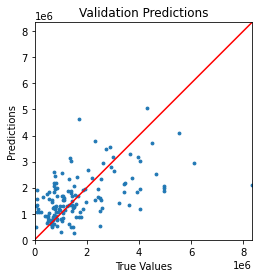

In [109]:
a = plt.axes(aspect='equal')
plt.scatter(val_labels, val_pred, s=8)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, max(np.max(val_labels), np.max(val_pred))]
plt.xlim(lims)
plt.ylim(lims)
plt.title('Validation Predictions')
_ = plt.plot(lims, lims, 'r')

In [110]:
#evaluate model on test data
y_test_predict = ridge_model.predict(test_features)
rmse_test = mean_squared_error(test_labels, y_test_predict, squared=False)
    
print(f"Degree {n} model test score: {ridge_model.score(test_features, test_labels)}")
print(f"Degree {n} model test RMSE: {rmse_test}")

Degree 1 model test score: 0.41437274477129193
Degree 1 model test RMSE: 1063977.9288837356


very high RMSE, not learning (negative R^2)